In [1]:
#!pip install tensorflow
#!pip install keras
#!pip install hyperopt
#!pip install hyperas
#!pip install seaborn

In [2]:
#!pip install tensorflow.keras

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense
from keras.layers import LSTM
#from sklearn import cross_validation
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import os

%matplotlib inline

In [4]:
#!pip install intrinio

In [5]:
import intrinio

In [6]:
intrinio.client.username = '8****'
intrinio.client.password = 'e****'

In [7]:
stock_data = intrinio.prices('AAPL', start_date='2014-01-01', end_date='2018-10-03')

In [8]:
stock_data.head()

,adj_close,adj_factor,adj_high,adj_low,adj_open,adj_volume,close,ex_dividend,high,low,open,split_ratio,volume
date,,,,,,,,,,,,,
2018-10-03,231.263088,1.0,232.658221,228.981051,229.250112,28654799.0,232.07,0.0,233.47,229.78,230.05,1.0,28654799.0
2018-10-02,228.482789,1.0,229.200286,225.842003,226.459848,24788170.0,229.28,0.0,230.00,226.63,227.25,1.0,24788170.0
2018-10-01,226.469813,1.0,228.622302,225.562977,227.157414,23600802.0,227.26,0.0,229.42,226.35,227.95,1.0,23600802.0
2018-09-28,224.955098,1.0,225.054750,223.241078,224.008401,22929364.0,225.74,0.0,225.84,224.02,224.79,1.0,22929364.0
2018-09-27,224.167845,1.0,225.652664,222.762747,223.041774,30181227.0,224.95,0.0,226.44,223.54,223.82,1.0,30181227.0


In [11]:
dataframe = pd.DataFrame(stock_data)

In [12]:
reversed_df = dataframe.iloc[::-1]

In [13]:
reversed_df.head()

,adj_close,adj_factor,adj_high,adj_low,adj_open,adj_volume,close,ex_dividend,high,low,open,split_ratio,volume
date,,,,,,,,,,,,,
2014-01-02,72.175589,1.0,72.684484,72.030881,72.508328,58791957.0,553.1300,0.0,557.03,552.021,555.68,1.0,8398851.0
2014-01-03,70.590187,1.0,72.249966,70.518420,72.158626,98303870.0,540.9800,0.0,553.70,540.430,553.00,1.0,14043410.0
2014-01-06,70.975120,1.0,71.349614,69.627202,70.134792,103359151.0,543.9300,0.0,546.80,533.600,537.49,1.0,14765593.0
2014-01-07,70.467204,1.0,71.240006,70.191553,71.026010,79432766.0,540.0375,0.0,545.96,537.925,544.32,1.0,11347538.0
2014-01-08,70.913792,1.0,71.187812,70.291375,70.307033,64686685.0,543.4600,0.0,545.56,538.690,538.81,1.0,9240955.0


In [15]:
reversed_df['Time'] = reversed_df.index

C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
#dataframe.columns = ['First', 'Last', '']
dataframe = reversed_df[['Time','adj_high','adj_low']]
dataframe.columns = ['Time', 'First', 'Last']
dataframe['Time']=pd.to_datetime(dataframe['Time'],infer_datetime_format=True)
dataframe.head()

C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Time,First,Last
date,,,
2014-01-02,2014-01-02,72.684484,72.030881
2014-01-03,2014-01-03,72.249966,70.518420
2014-01-06,2014-01-06,71.349614,69.627202
2014-01-07,2014-01-07,71.240006,70.191553
2014-01-08,2014-01-08,71.187812,70.291375


AxesSubplot(0.125,0.2;0.775x0.68)


C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 72.35768213,  71.38419311,  70.48840836, ..., 227.09263968,
       227.52114456, 230.81963563])

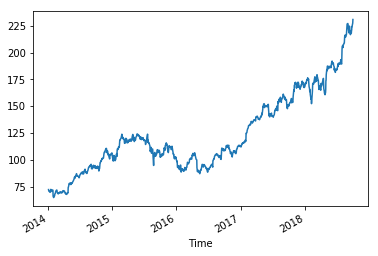

In [19]:
#Take Average value of opening and closing stock for smoothness

dataframe['Avg'] = (0.5*(dataframe['First'] + dataframe['Last']))
plot_df = dataframe[['Time', 'Avg']]
print(plot_df.set_index(plot_df.Time)['Avg'].plot())
dataset = dataframe.Avg.values
dataset

In [20]:
#Scaling the data set
dataset = (0.5*(dataframe['First'] + dataframe['Last'])).values
print(dataset)
min_max_scaler = MinMaxScaler()
nparr = np.array([dataset])
dataset = min_max_scaler.fit_transform(np.reshape(nparr, (len(nparr[0]), 1)))
dataset = np.reshape(dataset, (1, len(dataset)))[0]
dataset

[ 72.35768213  71.38419311  70.48840836 ... 227.09263968 227.52114456
 230.81963563]


array([0.04482156, 0.03895356, 0.03355394, ..., 0.97753438, 0.98011732,
       1.        ])

In [21]:
#Time delay function create time sequence of given delay

def timeDelay(data, delay):
    X_data, y_data = [], []
    #naive version, vectorized version can be implemented,
    #but may run out of memory,
    for i in range(delay, len(data)):
        X_data.append(data[i - (delay):i].tolist())
    X_data = np.array(X_data)
    y_data = data[delay:]
    print (X_data)
    print(y_data)
    
    plt.plot(range(len(X_data.flatten())), X_data.flatten(), linestyle='solid', color='green', label='time delayed data')
    plt.plot(range(len(y_data)), y_data, linestyle='solid', color='blue', label='original data')
    
    return np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1)), np.reshape(y_data, (len(y_data),))

In [22]:
#Create LSTM

def model():
    model = Sequential()
    #model.add(keras.layers.LSTM(hidden_nodes, input_shape=(window, num_features), consume_less="mem"))
    model.add(LSTM(5,input_shape=(5, 1), dropout=0.2))
    model.add(Dense(1))
    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print ("Compilation Time : ", time.time() - start)
    return model

[[0.04482156 0.03895356 0.03355394 0.03492449 0.03506803]
 [0.03895356 0.03355394 0.03492449 0.03506803 0.0342658 ]
 [0.03355394 0.03492449 0.03506803 0.0342658  0.03021506]
 ...
 [0.92383314 0.93773899 0.94071239 0.96014455 0.95978414]
 [0.93773899 0.94071239 0.96014455 0.95978414 0.97753438]
 [0.94071239 0.96014455 0.95978414 0.97753438 0.98011732]]
[0.0342658  0.03021506 0.0303999  ... 0.97753438 0.98011732 1.        ]


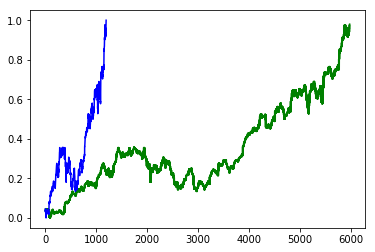

In [23]:
#define parameters

ratio = 0.8 # Training test ratio
d = 5 # Delay
X, y = timeDelay(dataset, d)
n = int(ratio * len(X))

In [24]:
print(X)
print(y)

[[[0.04482156]
  [0.03895356]
  [0.03355394]
  [0.03492449]
  [0.03506803]]

 [[0.03895356]
  [0.03355394]
  [0.03492449]
  [0.03506803]
  [0.0342658 ]]

 [[0.03355394]
  [0.03492449]
  [0.03506803]
  [0.0342658 ]
  [0.03021506]]

 ...

 [[0.92383314]
  [0.93773899]
  [0.94071239]
  [0.96014455]
  [0.95978414]]

 [[0.93773899]
  [0.94071239]
  [0.96014455]
  [0.95978414]
  [0.97753438]]

 [[0.94071239]
  [0.96014455]
  [0.95978414]
  [0.97753438]
  [0.98011732]]]
[0.0342658  0.03021506 0.0303999  ... 0.97753438 0.98011732 1.        ]


In [30]:
X_train, y_train = X[:n], y[:n]
X_test, y_test = X[n:], y[n:]

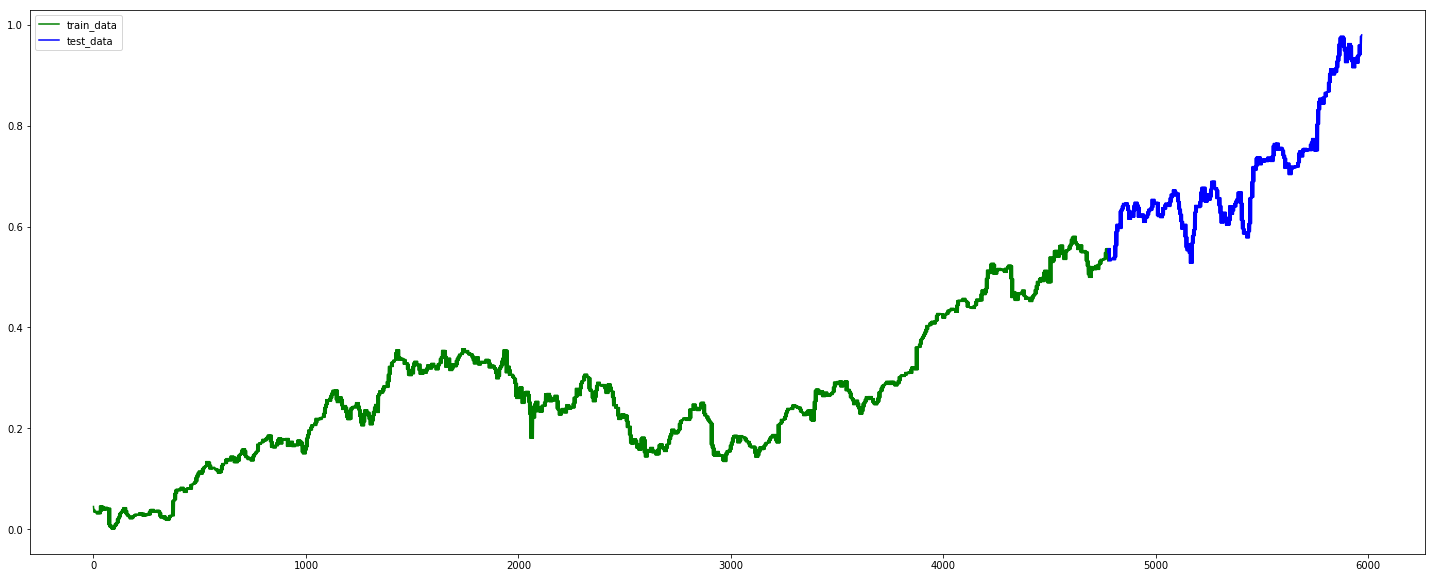

In [31]:
x_train_flattened = X_train.flatten()
x_test_flattened = X_test.flatten()
plt.figure(figsize=(25,10))
plt.plot(range(len(x_train_flattened)), x_train_flattened, linestyle='solid', color='green', label='train_data')
plt.plot(
    range(len(x_train_flattened), len(x_train_flattened) + len(x_test_flattened)), 
    x_test_flattened, linestyle='solid', color='blue', label='test_data')
plt.legend()

In [32]:
model = model()

Compilation Time :  0.07751750946044922


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
 - 2s - loss: 0.0214
Epoch 2/50
 - 0s - loss: 0.0097
Epoch 3/50
 - 0s - loss: 0.0097
Epoch 4/50
 - 0s - loss: 0.0095
Epoch 5/50
 - 0s - loss: 0.0102
Epoch 6/50
 - 0s - loss: 0.0088
Epoch 7/50
 - 0s - loss: 0.0098
Epoch 8/50
 - 0s - loss: 0.0079
Epoch 9/50
 - 0s - loss: 0.0064
Epoch 10/50
 - 0s - loss: 0.0070
Epoch 11/50
 - 0s - loss: 0.0064
Epoch 12/50
 - 0s - loss: 0.0071
Epoch 13/50
 - 0s - loss: 0.0075
Epoch 14/50
 - 0s - loss: 0.0071
Epoch 15/50
 - 0s - loss: 0.0066
Epoch 16/50
 - 0s - loss: 0.0069
Epoch 17/50
 - 0s - loss: 0.0062
Epoch 18/50
 - 0s - loss: 0.0057
Epoch 19/50
 - 0s - loss: 0.0056
Epoch 20/50
 - 0s - loss: 0.0055
Epoch 21/50
 - 0s - loss: 0.0056
Epoch 22/50
 - 0s - loss: 0.0058
Epoch 23/50
 - 0s - loss: 0.0060
Epoch 24/50
 - 0s - loss: 0.0056
Epoch 25/50
 - 0s - loss: 0.0051
Epoch 26/50
 - 0s - loss: 0.0053
Epoch 27/50
 - 0s - loss: 0.0055
Epoch 28/50
 - 0s - loss: 0.0051
Epoch 29/50
 - 0s - loss: 0.0054
Epoch 30/50
 - 0s - loss: 0.0055
Epoch 31/50
 - 0s -

In [35]:
baseline_testScore = min_max_scaler.inverse_transform(np.array([[mean_squared_error(y_test[10:], y_test[:-10])**.5]]))
trainScore = min_max_scaler.inverse_transform(np.array([[model.evaluate(X_train, y_train, verbose=0)**.5]]))
testScore = min_max_scaler.inverse_transform(np.array([[model.evaluate(X_test, y_test, verbose=0)**.5]]))

print('baseline test score = %.2f RMSE' % baseline_testScore)
print('train score = %.2f RMSE' % trainScore)
print('test score = %.2f RMSE' % testScore)

baseline test score = 73.80 RMSE
train score = 72.41 RMSE
test score = 81.41 RMSE


In [36]:
# generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [37]:
y = np.append(y_train, y_test)
y_pred = np.append(y_train_pred, y_test_pred)

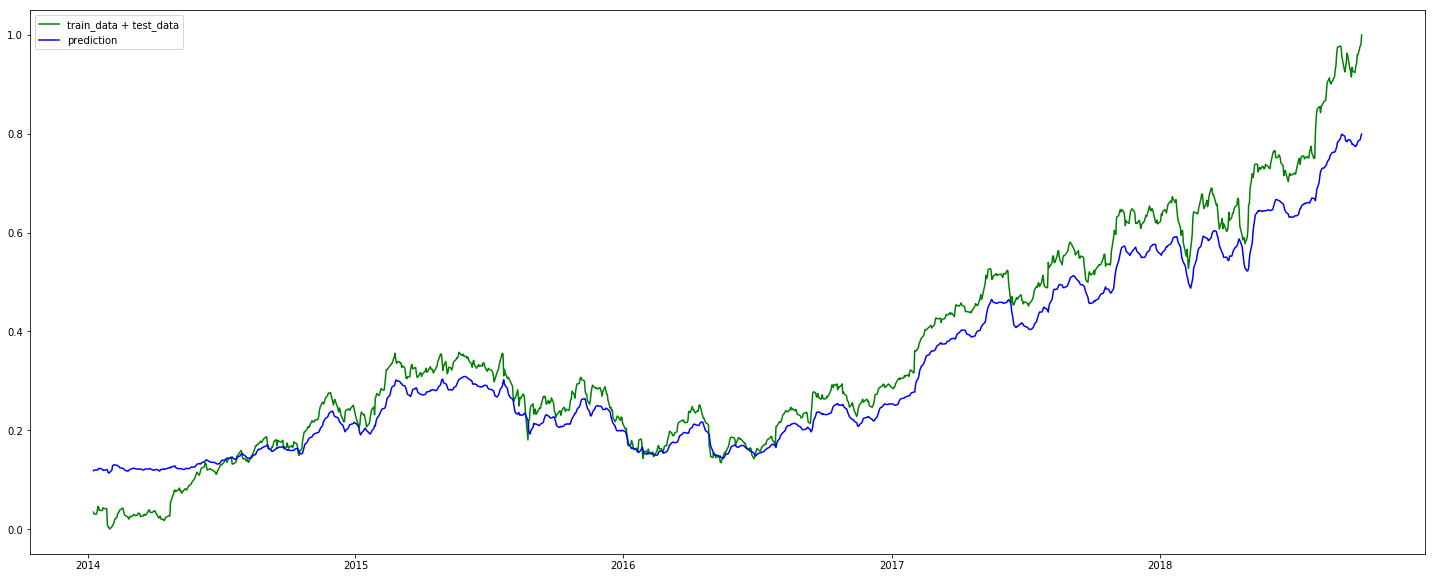

In [38]:
nn = 10000
plt.figure(figsize=(25,10))

plt.plot(dataframe['Time'][5:][-nn:], y[-nn:], linestyle='solid', color='green', label='train_data + test_data')
plt.plot(dataframe['Time'][5:][-nn:], y_pred[-nn:], linestyle='solid', color='blue', label='prediction')

plt.legend()